In [2]:
import geopandas as gpd
import pandas as pd
from matplotlib import pyplot as plt
from shapely.ops import unary_union

In [3]:
PATH_PROJECT = "/home/yoshraf/projects/mestrado/"

ZONA = [
    # Vila Sônia
    "Vila Sônia",
    # Morumbi
    "Morumbi",
    "Jóquei Clube",
    # Butantã
    "Jardim Caxingui",
    "Jardim Bonfiglioli",
    "Rio Pequeno",
    "Butantã",
    "Cidade Universitária",
    # Pinheiros
    "Pinheiros",
    "Jardim Europa",
    "Jardim Paulistano",
    "Alto Pinheiros",
    # Sacomã
    "Alto do Ipiranga",
    "Sacomã",
    "Moinho Velho",
    "Vila Heliópolis",
    "Ipiranga",
    "Vila Carioca",
    "Vila Independência",
    "Vila Sâo José",
    "Tamanduateí",
    "Vila Zelina",
    "Orfanato",
    "Vila Bertioga",
    "Água Rasa",
    "Linhas Corrente",
    "Vila Ema",
    "Vila Formosa"
]


In [4]:
df_ina_metro = pd.read_csv(f"{PATH_PROJECT}data/raw/inauguracoes.csv")
df_muni = gpd.read_file(
    f"{PATH_PROJECT}data/gis/od2017/Municipios_2017_region.shp")
gdf_neigh = gpd.read_file(
    f"{PATH_PROJECT}data/gis/od2017/Zonas_2017_region.shp")
gdf_metro = gpd.read_file(
    f"{PATH_PROJECT}data/gis/metro/SAD69-96_SHP_estacaometro_point.shp")
df17 = gpd.read_parquet(f"{PATH_PROJECT}data/processed/dataset17.parquet")
df17["geometry"] = df17["loc_domicilio"]

/home/yoshraf/projects/mestrado/venv/lib/python3.8/site-packages/geopandas/io/arrow.py:352: UserWarning: Multiple non-primary geometry columns read from Parquet/Feather file. The first column read was promoted to the primary geometry.
  warnings.warn(


In [5]:
gdf_neigh = gdf_neigh[gdf_neigh["NomeMunici"] == "São Paulo"]
gdf_neigh["Estudo"] = gdf_neigh["NomeZona"].apply(lambda x: 1 if x in ZONA else 0)

In [6]:
DEL_SUBWAY = [
    "SÃO LUCAS",
    "VILA TOLSTÓI",
    "VILA UNIÃO",
    "CAMILO HADDAD",
    "SÃO MATEUS",
    "FAZENDA DA JUTA",
    "SAPOPEMBA",
    "JARDIM PLANALTO",
    "SÃO PAULO-MORUMBI"
]

METROS = [
    "FARIA LIMA",
    "BUTANTÃ",
    "PINHEIROS",
    "FRADIQUE COUTINHO",
    "SACOMÃ",
    "VILA PRUDENTE",
    "TAMANDUATEÍ",
    "ORATÓRIO"
]

In [7]:
gdf_metro2 = gdf_metro[~ gdf_metro["emt_nome"].isin(DEL_SUBWAY)]
gdf_metro2 = gdf_metro2[gdf_metro2["emt_linha"] != "LILAS"]

In [8]:
gdf_metro_in = gdf_metro[gdf_metro["emt_nome"].isin(METROS)]

In [9]:
gdf_metro_buffer = gdf_metro_in.buffer(600)
gdf_metro_buffer2500 = gdf_metro_in.buffer(2500)

In [10]:
df_ina_metro["Inauguração"] = pd.to_datetime(df_ina_metro["Inauguração"])

<AxesSubplot:>

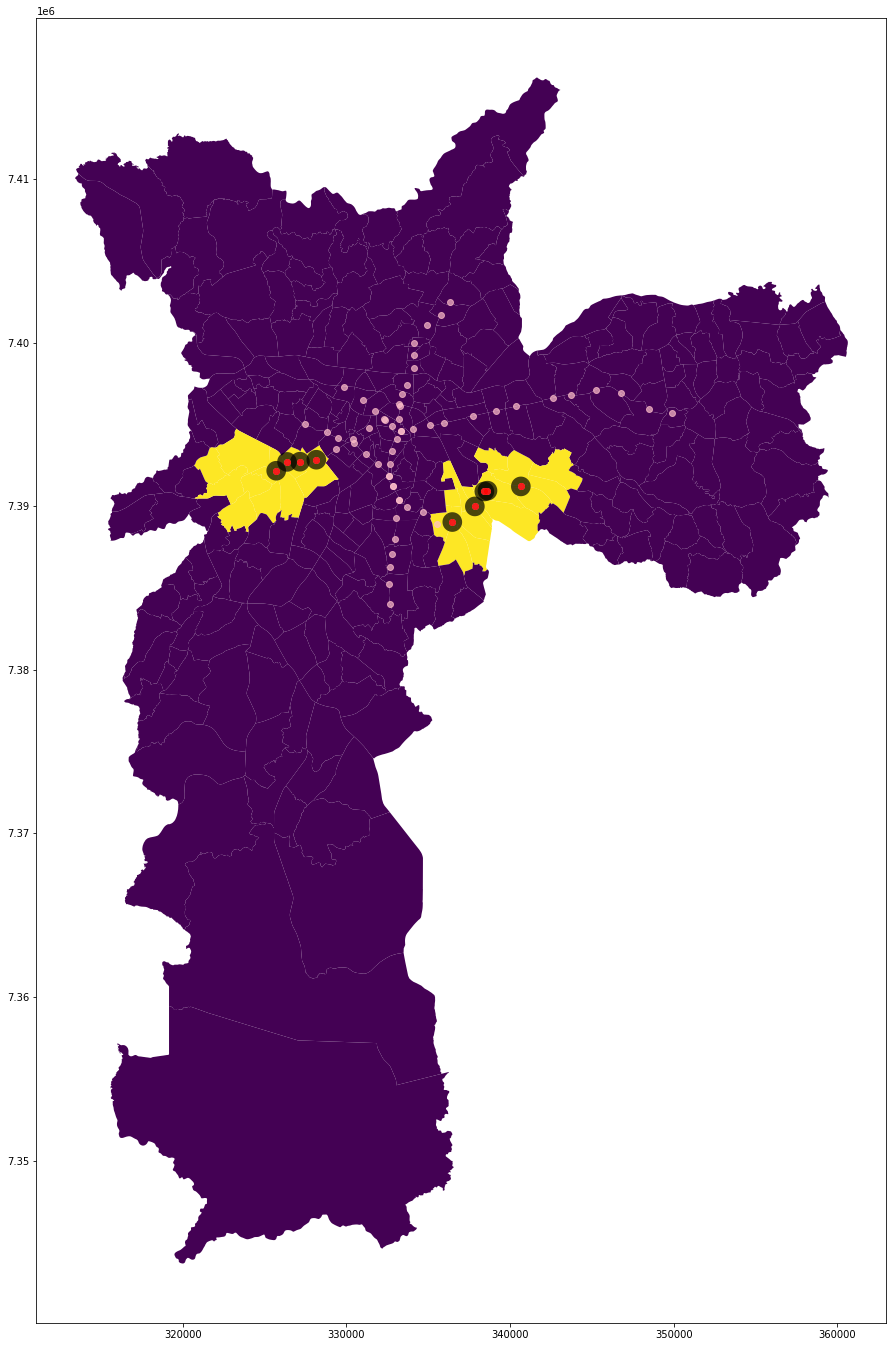

In [11]:
# Plot
f = 3
ax = gdf_neigh.plot(column="Estudo", figsize=(18 * f, 8 * f), legend=False)
ax2 = gdf_metro_buffer.plot(color="black", alpha=0.7, ax=ax)
ax3 = gdf_metro2.plot(color="pink", alpha=.7, ax=ax2)
gdf_metro_in.plot(color="red", alpha=.8, ax=ax3, )

<AxesSubplot:>

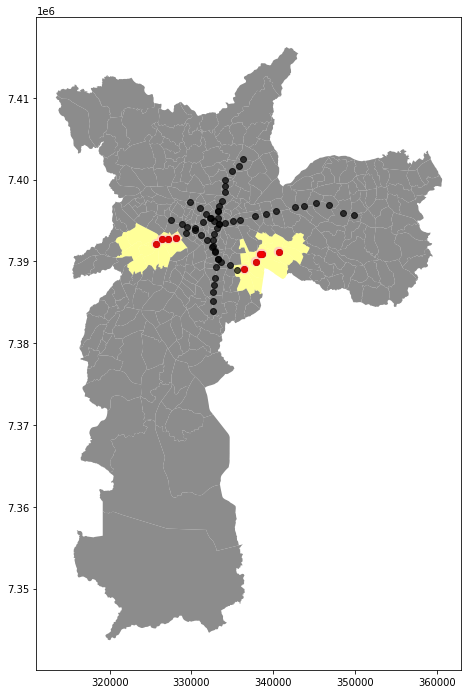

In [15]:
f = 1.5
ax = gdf_neigh[gdf_neigh["Estudo"]==0].plot(figsize=(18 * f, 8 * f), legend=False, alpha=.9, color="grey")
ax2 = gdf_neigh[gdf_neigh["Estudo"]==1].plot(color="yellow", alpha=.4, ax=ax)
ax3 = gdf_metro_buffer.plot(color="pink", alpha=0.7, ax=ax2)
ax4 = gdf_metro2.plot(color="black", alpha=.7, ax=ax3)
gdf_metro_in.plot(color="red", alpha=.8, ax=ax4, )

(7380000.0, 7400000.0)

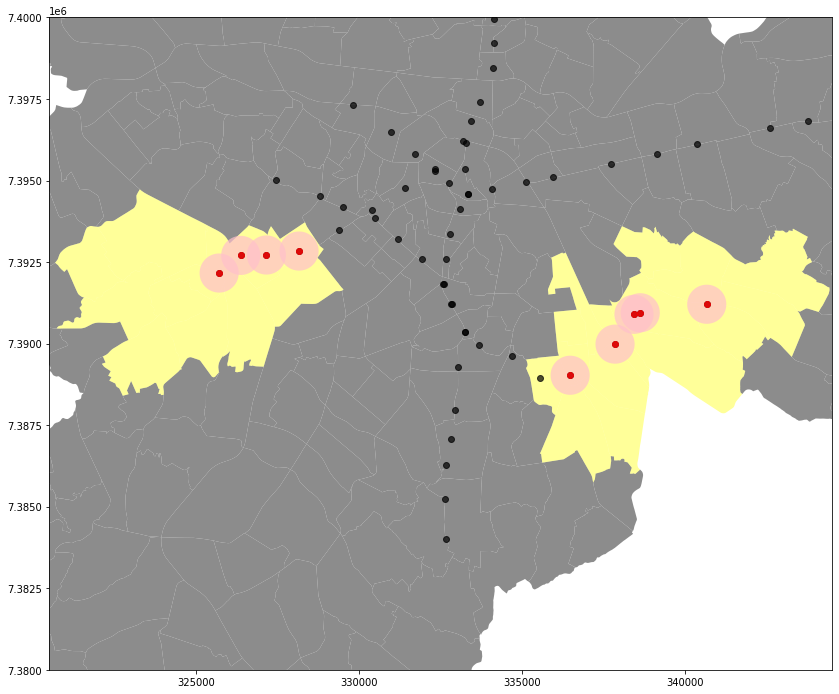

In [16]:
# Plot
f = 1.5
ax = gdf_neigh[gdf_neigh["Estudo"]==0].plot(figsize=(18 * f, 8 * f), legend=False, alpha=.9, color="grey")
ax2 = gdf_neigh[gdf_neigh["Estudo"]==1].plot(color="yellow", alpha=.4, ax=ax)
ax3 = gdf_metro_buffer.plot(color="pink", alpha=0.7, ax=ax2)
ax4 = gdf_metro2.plot(color="black", alpha=.7, ax=ax3)
gdf_metro_in.plot(color="red", alpha=.8, ax=ax4, )
plt.xlim([320_500,344_500])
plt.ylim([7_380_000,7_400_000])

In [44]:
def map_dist(x):
    if x <= 600:
        return .113
    elif (x > 600) & (x <= 1000):
        return .087
    elif (x > 100) & (x <= 1500):
        return .063
    elif (x > 1500) & (x <= 2000):
        return .048
    elif (x > 2000) & (x <= 2500):
        return .040
    elif x >= 2500:
        return 0
    else:
        raise Exception

In [72]:
df17["ATE"] = df17["loc_domicilio_dist_metro"].apply(map_dist)

df_relevo = gpd.read_file("/home/yoshraf/projects/mestrado/data/gis/ponto_cotado/sad6996_PONTO_COTADO_INTERVIA.shp")
region_all = gpd.sjoin(df_relevo, gdf_neigh[gdf_neigh["Estudo"]==1], how="inner", op='intersects')

In [108]:
mulipoint_metro = unary_union(gdf_metro_in["geometry"])
region_all["dis_metro"] = region_all["geometry"].apply(lambda x: mulipoint_metro.distance(x))
region_all["ATE"] = region_all["dis_metro"].apply(map_dist)

(7375000.0, 7410000.0)

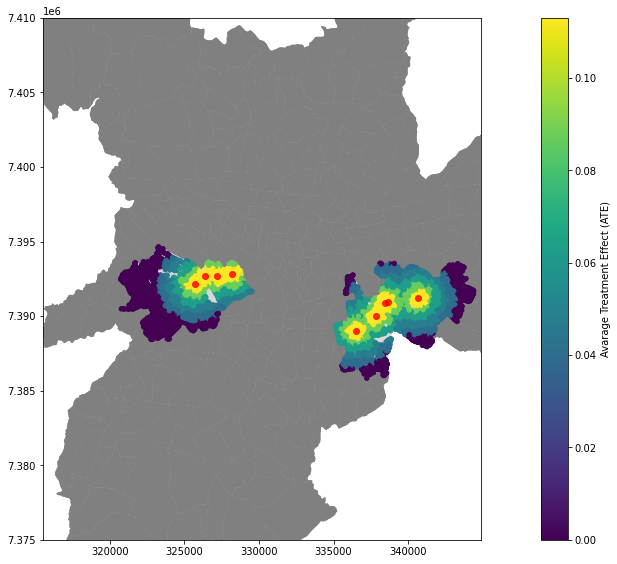

In [122]:
# Plot
f = 1.2
ax = gdf_neigh[gdf_neigh["Estudo"]==0].plot(figsize=(18 * f, 8 * f), legend=False, alpha=.9, color="grey")
ax2 = gdf_neigh[gdf_neigh["Estudo"]==1].plot(color="grey", alpha=.3, ax=ax)
ax3 = gdf_neigh[gdf_neigh["Estudo"]==0].plot(color="grey", ax=ax2)
ax4 = region_all.plot(column="ATE", legend=True, ax=ax3, s=20, legend_kwds={'label': "Avarage Treatment Effect (ATE)"})
gdf_metro_in.plot(color="red", alpha=.8, ax=ax4)
plt.xlim([315_500,344_900])
plt.ylim([7_375_000,7_410_000])

(7380000.0, 7400000.0)

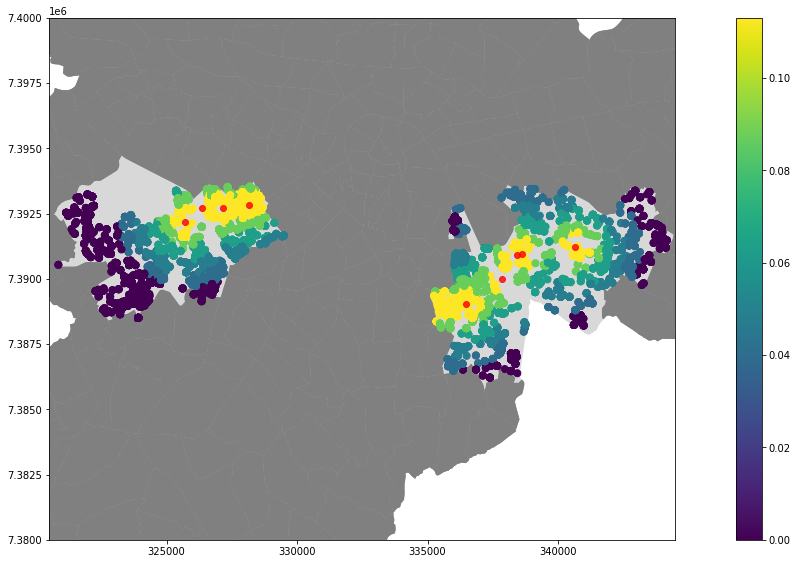

In [99]:
# Plot
f = 1.2
ax = gdf_neigh[gdf_neigh["Estudo"]==0].plot(figsize=(18 * f, 8 * f), legend=False, alpha=.9, color="grey")
ax2 = gdf_neigh[gdf_neigh["Estudo"]==1].plot(color="grey", alpha=.3, ax=ax)
ax3 = gdf_neigh[gdf_neigh["Estudo"]==0].plot(color="grey", ax=ax2)
ax4 = df17.plot(column="AT", legend=True, ax=ax3, s=50)
gdf_metro_in.plot(color="red", alpha=.8, ax=ax4)
plt.xlim([320_500,344_500])
plt.ylim([7_380_000,7_400_000])